<a href="https://colab.research.google.com/github/luiscunhacsc/finance_python/blob/main/25_Performance_Evaluation_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Performance Evaluation

**Purpose:** Assess how well a portfolio achieves its investment objectives.

**Importance:** Essential for making informed investment decisions and improving portfolio management.

**Metrics:** Various performance measurement metrics are used to evaluate different aspects of portfolio performance.


### Performance Measurement Metrics Overview

- **Absolute Metrics:** Measure returns without considering risk (e.g., total return, annualized return).
- **Risk-Adjusted Metrics:** Evaluate returns in relation to risk (e.g., Sharpe ratio, Treynor ratio, Sortino ratio).
- **Relative Metrics:** Compare portfolio performance to benchmarks (e.g., alpha, beta, information ratio).
- **Others:** Include additional considerations like maximum drawdown and tracking error.


### Absolute Performance Metrics

**Total Return:** Measures the overall return of a portfolio, including capital gains and income.

$$
\text{Total Return} = \frac{P_{end} - P_{start} + D}{P_{start}}
$$

**Annualized Return:** Adjusts the total return to reflect a yearly rate.

$$
\text{Annualized Return} = \left(1 + \text{Total Return}\right)^{\frac{1}{n}} - 1
$$


### Practical Example

**Scenario:** Calculate the total and annualized return for a portfolio.

**Steps:**
- Define initial and final portfolio values and dividends.
- Calculate total return.
- Calculate annualized return.


In [ ]:
# Example portfolio values
initial_value = 100000
final_value = 120000
dividends = 2000
years = 3

# Calculate total return
total_return = (final_value - initial_value + dividends) / initial_value
print(f"Total Return: {total_return:.4f}")

# Calculate annualized return
annualized_return = (1 + total_return) ** (1 / years) - 1
print(f"Annualized Return: {annualized_return:.4f}")


Total Return: 0.2200
Annualized Return: 0.0685


### Risk-Adjusted Performance Metrics

- **Sharpe Ratio:** Measures risk-adjusted return using standard deviation.

$$
\text{Sharpe Ratio} = \frac{\overline{R} - R_f}{\sigma}
$$

- **Treynor Ratio:** Measures risk-adjusted return using beta.

$$
\text{Treynor Ratio} = \frac{\overline{R} - R_f}{\beta}
$$

- **Sortino Ratio:** Similar to Sharpe Ratio but focuses on downside risk.

$$
\text{Sortino Ratio} = \frac{\overline{R} - R_f}{\sigma_D}
$$


### Practical Example

**Scenario:** Calculate the Sharpe, Treynor, and Sortino ratios for a portfolio.

**Steps:**
- Define portfolio returns, risk-free rate, and risk measures.
- Calculate Sharpe ratio.
- Calculate Treynor ratio.
- Calculate Sortino ratio.


In [ ]:
# Example data
average_return = 0.15
risk_free_rate = 0.01
std_dev = 0.10
beta = 1.2
downside_std_dev = 0.08

# Calculate Sharpe ratio
sharpe_ratio = (average_return - risk_free_rate) / std_dev
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Calculate Treynor ratio
treynor_ratio = (average_return - risk_free_rate) / beta
print(f"Treynor Ratio: {treynor_ratio:.4f}")

# Calculate Sortino ratio
sortino_ratio = (average_return - risk_free_rate) / downside_std_dev
print(f"Sortino Ratio: {sortino_ratio:.4f}")


Sharpe Ratio: 1.4000
Treynor Ratio: 0.1167
Sortino Ratio: 1.7500


### Performance Evaluation using Real S&P 500 Data

In this section, we will calculate the Sharpe, Treynor, and Sortino ratios for the S&P 500 using real historical data from Yahoo Finance. We will examine these metrics over different time windows to observe how performance changes over time.


In [ ]:
%pip install -q yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download S&P 500 historical data
sp500 = yf.download('^GSPC', start='2015-01-01', end='2023-01-01')

# Calculate daily returns
sp500['Daily Return'] = sp500['Adj Close'].pct_change().dropna()

# Display the first few rows to ensure the data is correct
sp500.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000,NaN
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000,-0.018278
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000,-0.008893
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000,0.011630
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000,0.017888


### Calculate Risk-Adjusted Performance Metrics

We will calculate the Sharpe, Treynor, and Sortino ratios for different time windows:
- 1 Year
- 3 Years
- 5 Years

The risk-free rate is assumed to be 1% for simplicity.


In [ ]:
# Define risk-free rate
risk_free_rate = 0.01

# Function to calculate the ratios
def calculate_ratios(data, beta):
    avg_return = data['Daily Return'].mean() * 252  # Annualize the return
    std_dev = data['Daily Return'].std() * np.sqrt(252)  # Annualize the volatility
    downside_std_dev = data[data['Daily Return'] < 0]['Daily Return'].std() * np.sqrt(252)  # Annualized downside deviation

    sharpe_ratio = (avg_return - risk_free_rate) / std_dev
    treynor_ratio = (avg_return - risk_free_rate) / beta
    sortino_ratio = (avg_return - risk_free_rate) / downside_std_dev

    return sharpe_ratio, treynor_ratio, sortino_ratio

# Estimate beta of S&P 500 (assuming beta is 1 as it's a market index)
beta_sp500 = 1.0

# Calculate for different time windows
ratios = {}
time_windows = {'1 Year': '2022-01-01', '3 Years': '2020-01-01', '5 Years': '2018-01-01'}

for period, start_date in time_windows.items():
    data_window = sp500[sp500.index >= start_date]
    ratios[period] = calculate_ratios(data_window, beta_sp500)

# Display the results
ratios_df = pd.DataFrame(ratios, index=['Sharpe Ratio', 'Treynor Ratio', 'Sortino Ratio'])
ratios_df


,1 Year,3 Years,5 Years
Sharpe Ratio,-0.818463,0.314681,0.395490
Treynor Ratio,-0.197851,0.080091,0.086464
Sortino Ratio,-1.308062,0.390588,0.477916


### Analyzing the Results

The table below shows the calculated Sharpe, Treynor, and Sortino ratios for the S&P 500 over different time windows. These metrics provide insights into the risk-adjusted performance of the index:

- **Sharpe Ratio:** Indicates how much return is generated for each unit of risk.
- **Treynor Ratio:** Measures return per unit of systematic risk (beta).
- **Sortino Ratio:** Similar to the Sharpe Ratio, but only penalizes downside risk.

By comparing these ratios across different time periods, we can assess how the risk-adjusted performance of the S&P 500 has evolved.


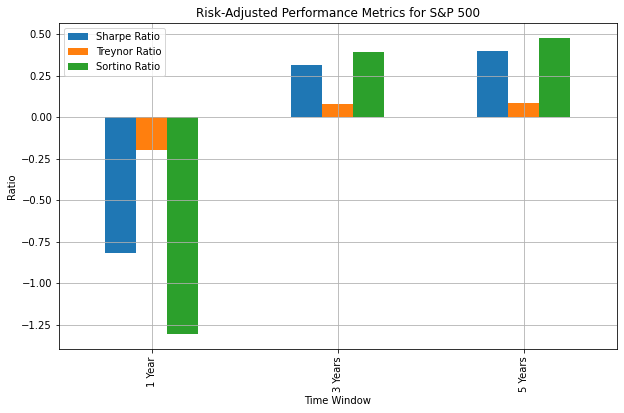

In [ ]:
# Visualizing the ratios
ratios_df.T.plot(kind='bar', figsize=(10, 6))
plt.title('Risk-Adjusted Performance Metrics for S&P 500')
plt.ylabel('Ratio')
plt.xlabel('Time Window')
plt.grid(True)
plt.show()
